In [2]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
#download stop-words
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sures\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sures\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sures\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# For data cleaning
def clean(text):
    #Removing links, #tag , @mentions
    text = re.sub(r'@ [A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)    
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)
    
    
    text = " ".join(text.split())
    text = ''.join(c for c in text if c not in emoji.UNICODE_EMOJI) 
    text = text.replace("_", " ") 
    #Removing non-English words
    text = " ".join(w for w in nltk.wordpunct_tokenize(text) \
         if w.lower() in words or not w.isalpha())
  
    
    return text

In [3]:
df = pd. read_csv('dataset.csv', encoding="latin-1")
df.head()


,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
df.describe()

,ItemID,Sentiment
count,99989.000000,99989.000000
mean,50005.110042,0.564632
std,28865.894393,0.495808
min,1.000000,0.000000
25%,25009.000000,0.000000
50%,50006.000000,1.000000
75%,75003.000000,1.000000
max,100000.000000,1.000000


In [5]:
df.drop(['ItemID'], axis = 1)

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
...,...,...
99984,0,@Cupcake seems like a repeating problem hop...
99985,1,@cupcake__ arrrr we both replied to each other...
99986,0,@CuPcAkE_2120 ya i thought so
99987,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [6]:
df['SentimentText']=df['SentimentText'].apply(clean)

In [7]:
count = (df['Sentiment'] == 0).sum()
count

43532

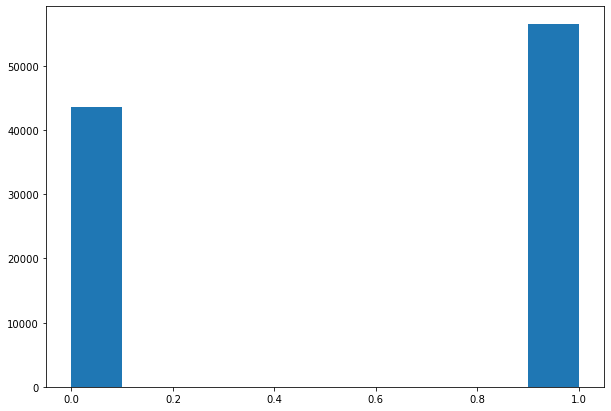

In [8]:
from matplotlib import pyplot as plt
fig, graph = plt.subplots(figsize =(10, 7))
graph.hist(df['Sentiment'])
plt.show()

In [9]:
# Cleaning and formatting data
corpus = []
for i in range(0, len(df)):
    mgs = re.sub('[^a-zA-Z]', ' ', df['SentimentText'][i])
    mgs = mgs.lower()
    mgs = mgs.split()
    #removing stopwords
    mgs = [wordnet.lemmatize(word) for word in mgs if not word in set(stopwords.words('english'))]
    mgs = ' '.join(mgs)
    corpus.append(mgs)

    
# Creating the TF-IDF model
    
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray() 
y = df['Sentiment']

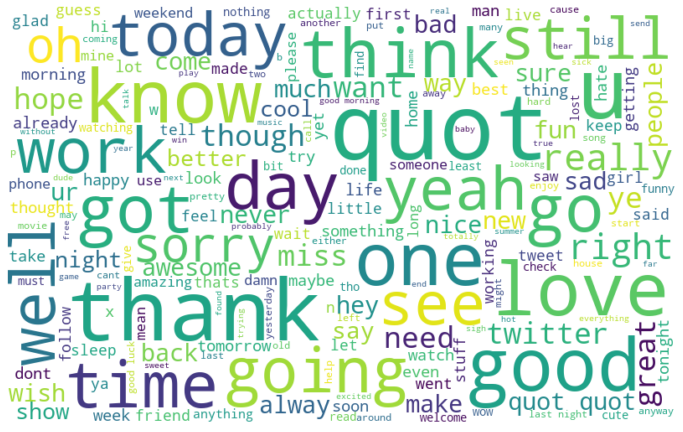

In [10]:
all_words = ' '.join([text for text in corpus])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, background_color='white', max_font_size=110).generate(all_words)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


# Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
sentiment_model = MultinomialNB().fit(X_train, y_train)


# Training model using Stochastic Gradient Descent
#sentiment_model=SGDClassifier().fit(X_train, y_train)



y_pred=sentiment_model.predict(X_test)    

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
 
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

#Accuracy percentage
print(accuracy*100)

71.54382104877153


In [12]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['Sentiment1']= df['SentimentText'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [15]:
power = []
for i in range(0, len(df)):
    if df['Sentiment1'][i] > 0.2:
        power.append(1)
    else:
        power.append(0)

df['pw']=power
from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(df['Sentiment'],df['pw'])
 
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(df['Sentiment'],df['pw'])
print(accuracy*100)

63.05493604296473
